In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Silhouette scores
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def sil_score(X, k_candidates, random_seed=324):
    scores = []
    for k in k_candidates:
        km = KMeans(n_clusters=k, random_state=random_seed)
        cluster_labels = km.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters = {} the average silhouette_score is: {}'.format(k, silhouette_avg))
        scores.append(silhouette_avg)
    
    optimal_k = k_candidates[np.argmax(scores)]
    print(f"\nOptimal k={optimal_k}")
    return optimal_k

In [3]:
# elbow method
def elbow(X, k_candidates, random_seed=324):
    inertias = []
    for k in k_candidates:
        model = KMeans(n_clusters=k, random_state=random_seed, max_iter=500).fit(X)
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Inertia')
    plt.xticks(ks)
    plt.show()

In [4]:
from sklearn.decomposition import PCA
# Plot the explained variances
def explained_var(pca):
    plt.bar(range(len(pca.components_)), pca.explained_variance_ratio_.cumsum())
    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.title('PCA % Explained Variance')
    plt.show()

In [5]:
def visualize_optimal_kmeans(X, optimal_k):
    cluster_pred = KMeans(optimal_k, random_state=324, max_iter=500).fit_predict(X) # train kmeans
    pca = PCA(n_components=X.shape[1]).fit(X) # fit pca
    X_pca = pca.transform(X)

    plt.figure(figsize=(5,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, c=cluster_pred)
    plt.show()
    
    X_temp = X.copy()
    X_temp['Cluster'] = cluster_pred
    X_temp.groupby('Cluster').median().T.plot.bar(figsize=(20,10))
    
    return pca

# 1) KMeans for ACS + MinMaxScaled crime data

In [6]:
# load data
data_crimeScaled = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0)
X_cs = data_crimeScaled.iloc[:, 2:] # with crime MinMaxScaled

X_cs.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315
Bedford,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.009682,0.008536,0.015215,0.009528


### 1.1 Silhouette method

In [12]:
ks = range(2, 10)
optimal_k = sil_score(X_cs, ks)

For n_clusters = 2 the average silhouette_score is: 0.3791543471381237
For n_clusters = 3 the average silhouette_score is: 0.3807220583926412
For n_clusters = 4 the average silhouette_score is: 0.34242318861887994
For n_clusters = 5 the average silhouette_score is: 0.36393747172406254
For n_clusters = 6 the average silhouette_score is: 0.377519644373061
For n_clusters = 7 the average silhouette_score is: 0.3664031504592393
For n_clusters = 8 the average silhouette_score is: 0.3576852589885493
For n_clusters = 9 the average silhouette_score is: 0.31653886701445255

Optimal k=3


### 1.2 Elbow method

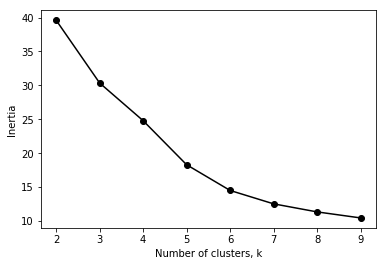

In [13]:
ks = range(2, 10)
elbow(X_cs, ks)
# potential elbow point at k=2

### 1.2.1 Visualising clusters (using PCA) and neighborhood profiles according to clusters

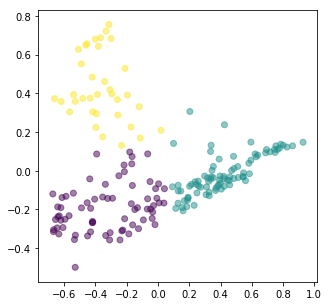

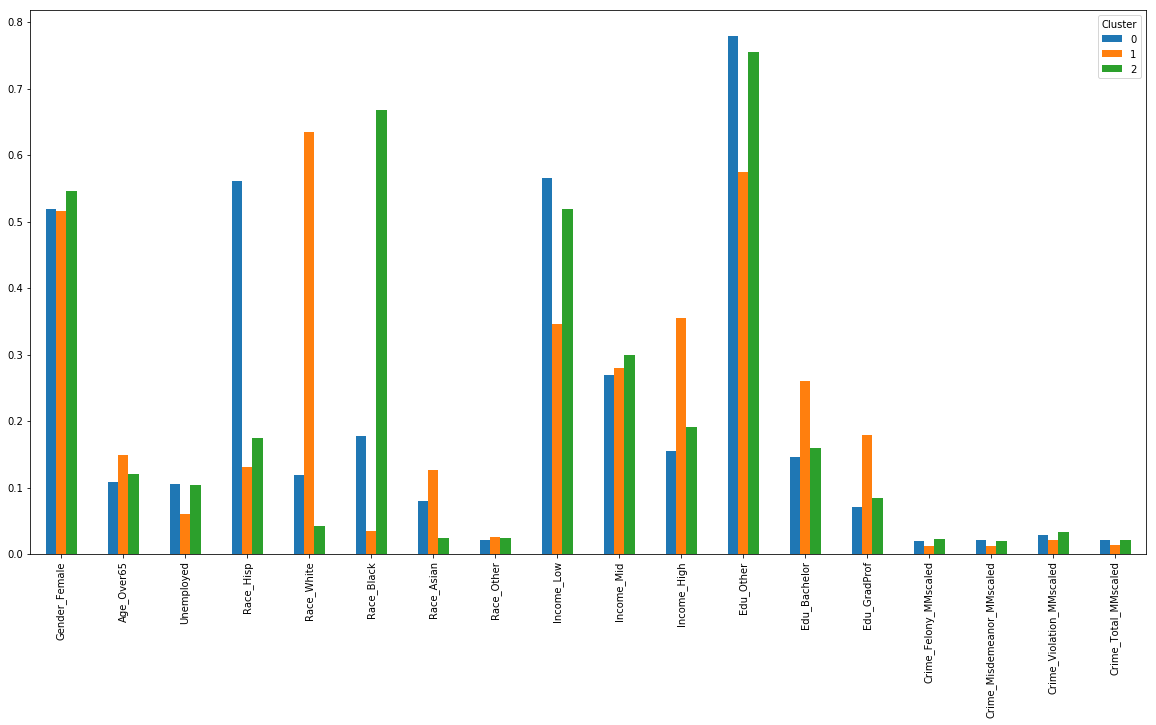

In [14]:
pca = visualize_optimal_kmeans(X_cs, optimal_k)

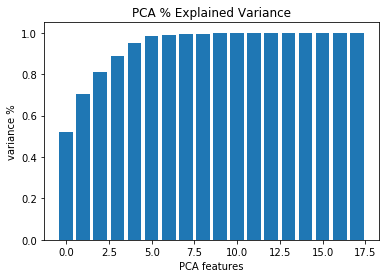

In [15]:
explained_var(pca)

# first two features explain ~70%

# 2) Kmeans with ACS + Unscaled crime data 

In [16]:
# load data
data_crimeUnscaled = pd.read_csv('../data/Data_crimeUnscaled.csv', index_col=0)
X_cus = data_crimeUnscaled.iloc[:, 2:] # with crime scaled

X_cus.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felonies_unscaled,Crime_Misdemeanor_unscaled,Crime_Violation_unscaled,Crime_Total_unscaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.030033,0.065645,0.014444,0.110123
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.033627,0.082051,0.023833,0.139510
Bedford,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.082026,0.124671,0.032993,0.239690
Bensonhurst East,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.029377,0.048003,0.014969,0.092349
Bensonhurst West,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.027704,0.045981,0.013105,0.086790


In [17]:
ks = range(2, 10)
optimal_k = sil_score(X_cus, ks)

For n_clusters = 2 the average silhouette_score is: 0.9242552219877237
For n_clusters = 3 the average silhouette_score is: 0.37252947669978964
For n_clusters = 4 the average silhouette_score is: 0.37991513828398943
For n_clusters = 5 the average silhouette_score is: 0.39045143930329307
For n_clusters = 6 the average silhouette_score is: 0.34801559649243957
For n_clusters = 7 the average silhouette_score is: 0.3614427456417146
For n_clusters = 8 the average silhouette_score is: 0.3514873117669744
For n_clusters = 9 the average silhouette_score is: 0.3540215017843825

Optimal k=2


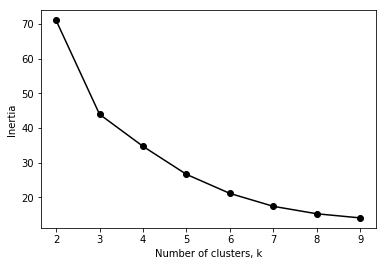

In [18]:
elbow(X_cus, ks)
# elbow at k=3

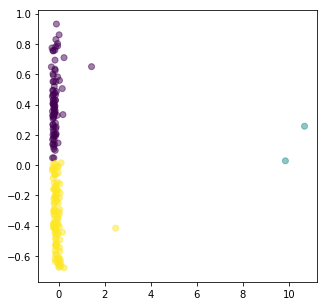

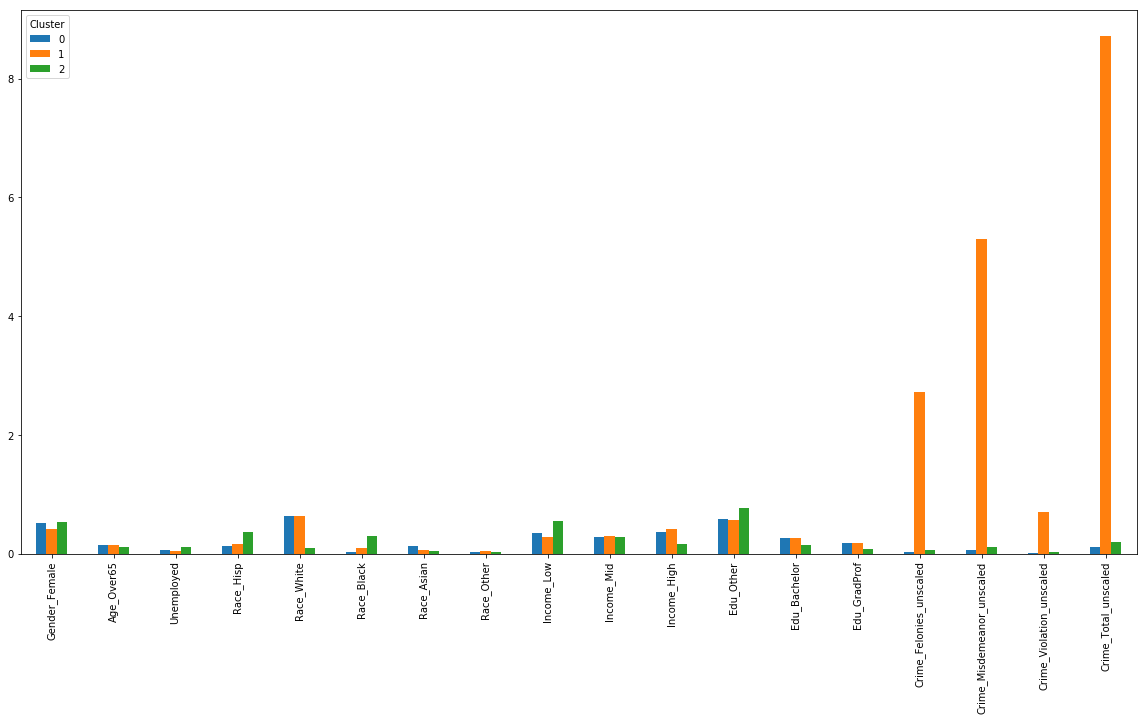

In [19]:
pca = visualize_optimal_kmeans(X_cus, 3)

# clusters look bad and crime vals look very skewed

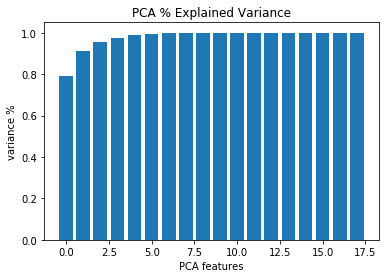

In [20]:
explained_var(pca)
# still, first 2 components explain most of the variance

# 3) KMeans without crime

In [21]:
data2 = data_crimeScaled[['Gender_Female', 'Age_Over65',
       'Unemployed', 'Race_Hisp', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_Other', 'Income_Low', 'Income_Mid', 'Income_High', 'Edu_Other',
       'Edu_Bachelor', 'Edu_GradProf']]

In [22]:
optimal_k = sil_score(data2, range(2, 10))

For n_clusters = 2 the average silhouette_score is: 0.3908168810410699
For n_clusters = 3 the average silhouette_score is: 0.4007317044467203
For n_clusters = 4 the average silhouette_score is: 0.3629960415035128
For n_clusters = 5 the average silhouette_score is: 0.3790221710112364
For n_clusters = 6 the average silhouette_score is: 0.36900602556540957
For n_clusters = 7 the average silhouette_score is: 0.342343385279898
For n_clusters = 8 the average silhouette_score is: 0.33988372453654153
For n_clusters = 9 the average silhouette_score is: 0.3253562804642598

Optimal k=3


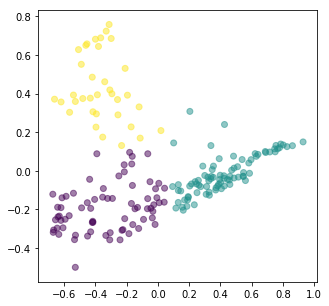

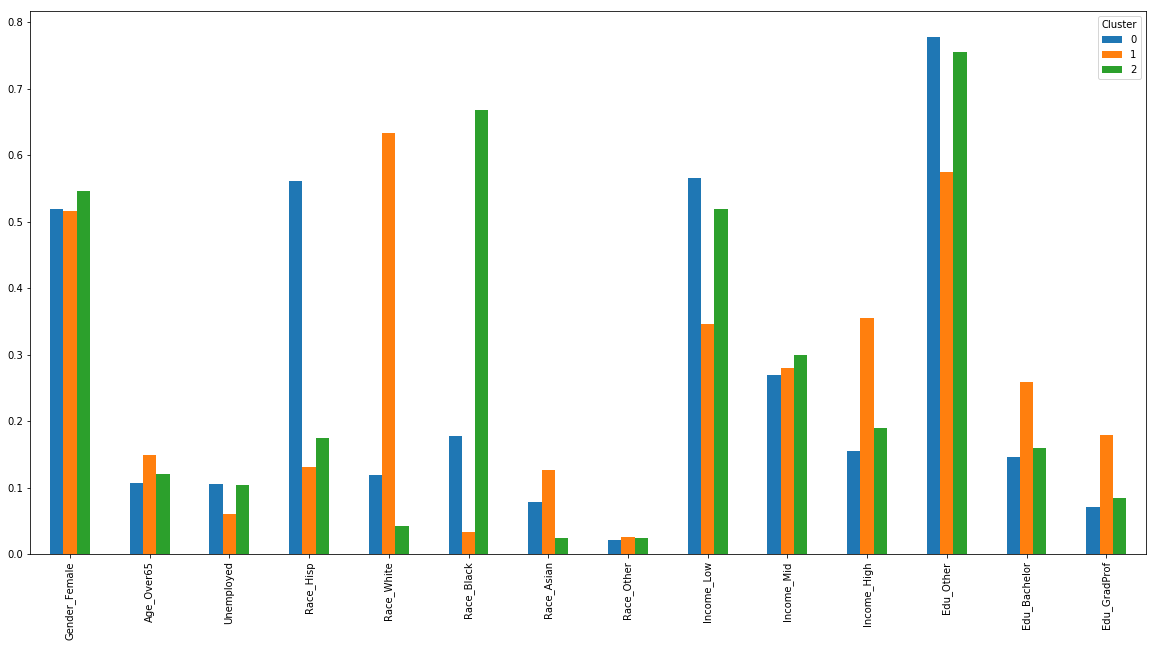

In [23]:
pca = visualize_optimal_kmeans(data2, optimal_k)

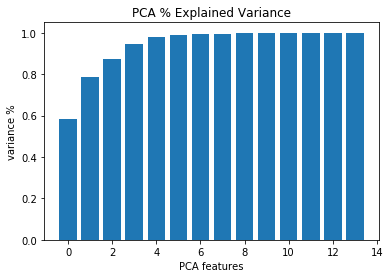

In [24]:
explained_var(pca)

# 4) Tried another combination of features for PCA round2 

In [25]:
data3 = data_crimeScaled[['Gender_Female', 'Unemployed', 'Race_Hisp', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_Other', 'Income_Low', 'Income_Mid', 'Income_High', 'Edu_Other',
       'Edu_Bachelor', 'Edu_GradProf']]

In [26]:
optimal_k = sil_score(data3, range(2, 10))

For n_clusters = 2 the average silhouette_score is: 0.39299417569353096
For n_clusters = 3 the average silhouette_score is: 0.4037713649209162
For n_clusters = 4 the average silhouette_score is: 0.3662647849568021
For n_clusters = 5 the average silhouette_score is: 0.38284828713844404
For n_clusters = 6 the average silhouette_score is: 0.37194075397825654
For n_clusters = 7 the average silhouette_score is: 0.3656003558331745
For n_clusters = 8 the average silhouette_score is: 0.32680542435126364
For n_clusters = 9 the average silhouette_score is: 0.32769114612439454

Optimal k=3


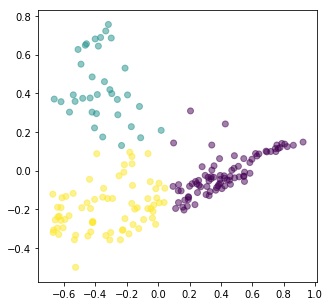

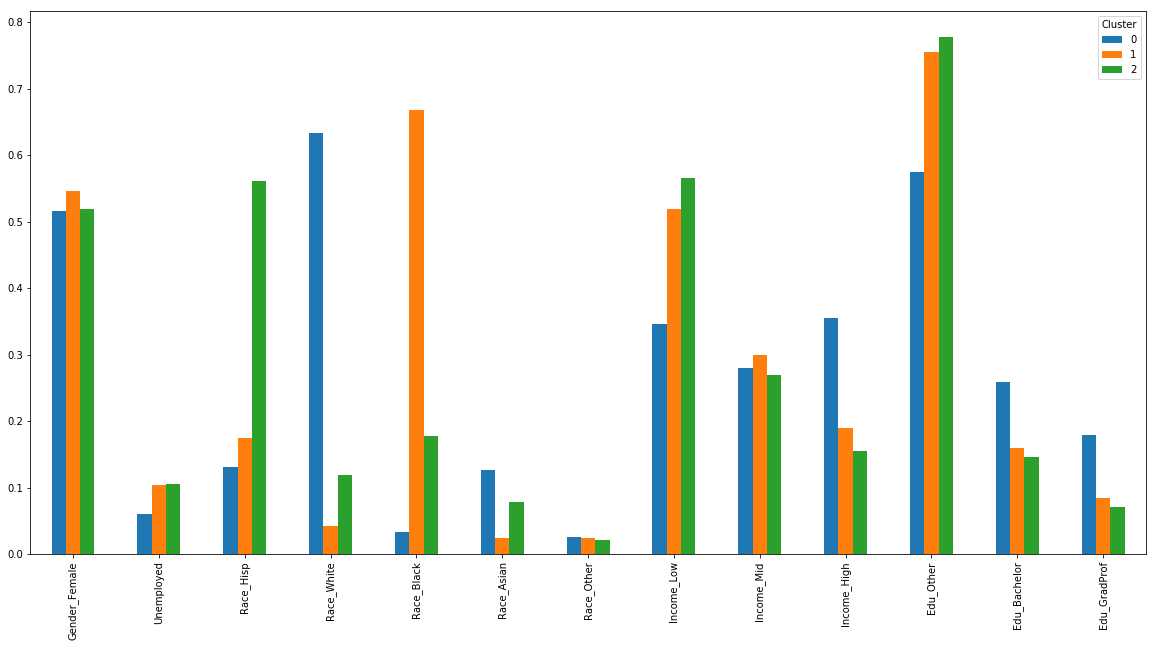

In [27]:
pca = visualize_optimal_kmeans(data3, 3)

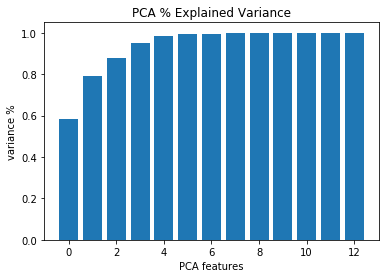

In [28]:
explained_var(pca)

# GMM and DBScan

In [29]:

from sklearn.mixture import GaussianMixture as GMM # You can import this only if you are using 0.18+ sklearn.

In [ ]:
#trying gaussian & dbscan but not sure if correct
gmm = GMM(n_components=3).fit(acscrime1)
labels = gmm.predict(acscrime1)
plt.scatter(acscrime1.iloc[:,0],acscrime1.iloc[:,1],c=rr.labels_)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
res2 = DBSCAN(eps=0.1, min_samples=3).fit(acscrime1)
L2=res2.labels_

In [ ]:
plt.scatter(acscrime1.iloc[:,0],acscrime1.iloc[:,1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')